# #Multifiber

In [1]:
%load_ext autoreload
%autoreload 2
import sys
codebase_dir = '/Users/juan/ZiaLab/Codebase'
sys.path.append(codebase_dir)
import wavesight as ws
import numpy as np
from matplotlib import pyplot as plt
import h5py

This notebook shows how the modes of a step-index fiber are calculated. This is a simple task that involves solving the roots of a trascendental equation. There is some nuance in how to solve for all the zeros, since some of them start getting increasingly close, but the task is fundamentally simple.

## ##Theoretical Background

<center> <img src="notebook_imgs/multisolver.jpeg" style="width: 100%;"/> </center>

<center> <img src="notebook_imgs/2023-08-01-17-04-00.png" style="width: 100%;"/> </center>

<center> <img src="notebook_imgs/2023-08-01-17-04-18.png" style="width: 100%;"/> </center>

<center> <img src="notebook_imgs/2023-08-01-17-04-33.png" style="width: 100%;"/> </center>

<center> <img src="notebook_imgs/2023-08-01-17-04-48.png" style="width: 100%;"/> </center>

## ##multisolver

### ###FG050LGA

The FG050LGA is a multimode fiber with the following characteristics:

* Core diameter (50 ± 1) μm. 
* Cladding diameter (125 +1/-2) μm.
* (0.22 ± 0.02) NA
* Low OH content (probably a few parts per 10⁹)
* Operating wavelengths [400 - 2400] nm
* Core is of pure SiO₂.
* Cladding is fluorine-doped SiO₂.
* At 808 nm its attenuation should at most be 8 dB per km, typical attenueation show in the plot below.
* At 600 nm it has about 1700 propagating modes.

More details [here](https://www.thorlabs.com/thorproduct.cfm?partnumber=FG050LGA).

<center> <img src="notebook_imgs/2023-08-01-10-20-14.png" style="width: 100%;"/> </center>

### ###Calculate the allowed propagation constants kz

In [74]:
# fiber_spec = {'NA': 0.22,
#               'nCore': 1.45,
#               'coreRadius':25.,
#               'grid_divider': 2,
#               'nFree': 1.,
#               'free_space_wavelength': 0.600}
fiber_spec = {'NA': 0.5,
              'nCore': 1.45,
              'coreRadius':10.,
              'grid_divider': 2,
              'nFree': 1.,
              'free_space_wavelength': 0.600}
fiber_sol = ws.multisolver(fiber_spec,
                           solve_modes = 'all',
                           drawPlots=False,
                           verbose=True)

Estimating nCladding from nCore and NA ...
Approx number of complex HE modes:  659
Approx number of TE modes:  26
Approx number of TM modes:  26
Approx number of total modes:  1370
Approx Max n for HE modes:  36
Calculating TE(0,n) propagation constants ...
Calculating TM(0,n) propagation constants ...
Calculating HE(m,n) propagation constants ...
m=48
HE modes = 1344
TE modes = 32
TM modes = 32
TOTAL modes = 1408
FROM_Vnum = 1370


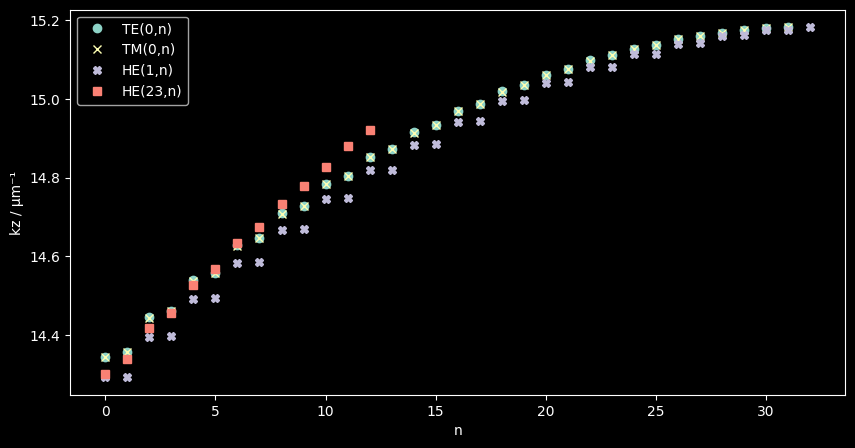

In [76]:
plt.figure(figsize=(10, 5))
plt.plot(fiber_sol['TEkz'][0], 'o', label='TE(0,n)')
plt.plot(fiber_sol['TMkz'][0], 'x', label='TM(0,n)')
keys = list(fiber_sol['HEkz'].keys())
if len(keys):
    plt.plot(fiber_sol['HEkz'][keys[0]], 'X', label='HE(1,n)')
    middle_key = int(len(keys)/2)
    plt.plot(fiber_sol['HEkz'][keys[middle_key]], 's', label='HE(%d,n)' % middle_key)
plt.xlabel('n')
plt.ylabel('kz / μm⁻¹')
plt.legend()
plt.show()

### ###Calculate the numerical mode basis

The propagation constants determine the corresponding fields. If numerical approximations to these modes are to be used frequently, a function that calculates a numerical approximation for all the modes might prove useful unless memory constraints become an issue. The function `calculate_numerica_basis` does precisely that.

In [13]:
?ws.calculate_numerical_basis

Signature: ws.calculate_numerical_basis(fiber_sol)
Docstring:
Given a solution for the propagation modes of an optical waveguide, calculate a numerical basis.

Parameters
----------
fiber_sol : dict
    A dictionary containing the fiber solution. It needs to have
    the following keys:
    - 'coreRadius' : float
        The radius of the core.
    - 'nCladding' : float
        The refractive index of the cladding.
    - 'nCore' : float
        The refractive index of the core.
    - 'free_space_wavelenegth' : float
        The wavelength of the light in free space.
    - 'totalModes' : int
        The total number of calculated modes.
    - 'TEkz' : 1D dict
        A single key equal to m=0, the values are array with
        the TE modes propagation constants.
    - 'TMkz' : 1D dict
        A single key equal to m=0, the values are array with
        the TM modes propagation constants.
    - 'HEkz' : 1D dict
        Keys are m values, values are 1D arrays of kz values.
Returns
-------

In [79]:
fiber_sol = ws.calculate_numerical_basis(fiber_sol)

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/32 [00:00<?, ?it/s]

  0%|          | 0/33 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/31 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/29 [00:00<?, ?it/s]

  0%|          | 0/28 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/27 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/23 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/21 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/19 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/17 [00:00<?, ?it/s]

  0%|          | 0/16 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/15 [00:00<?, ?it/s]

  0%|          | 0/14 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/13 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/11 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/9 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/6 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/5 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

In [14]:
# h5_file = h5py.File('bigdummy.h5','w')
# dset = h5_file.create_dataset('eigenBasis', data = fiber_sol['eigenbasis'])
# h5_file.close()

In [4]:
# pickle.dump(fiber_sol, open('eigenbasis-FG050LGA.pkl', 'wb'))

In [80]:
# fiber_sol = pickle.load(open('eigenbasis-FG050LGA.pkl', 'rb'))
fiber_sol['coord_layout'] = ws.coordinate_layout(fiber_sol)

### ###Plot the modes

In [81]:
from matplotlib.colors import LogNorm
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib.patches import Circle
import matplotlib.ticker as ticker
from tqdm.notebook import tqdm
import cmasher as cm

In [82]:
a, b, Δs, xrange, yrange, ρrange, φrange, Xg, Yg, ρg, φg, nxy, crossMask, numSamples = fiber_sol['coord_layout']
nCore = fiber_sol['nCore']
nCladding = fiber_sol['nCladding']
λfree = fiber_sol['free_space_wavelength']

In [83]:
annotations = []

for modtype in ['TE','TM','HE']:
    solkey = modtype + 'kz'
    for m, kzs in fiber_sol[solkey].items():
        for kzidx, kz in enumerate(kzs):
            γ = np.sqrt(nCore**2*4*np.pi**2/λfree**2 - kz**2)
            β = np.sqrt(kz**2 - nCladding**2*4*np.pi**2/λfree**2)
            annotationTR = '%s(%d,%d)' % (modtype, m, kzidx)
            annotationBR = 'kz=%.3f µm⁻¹' % (kz)
            annotations.append((annotationTR, annotationBR))

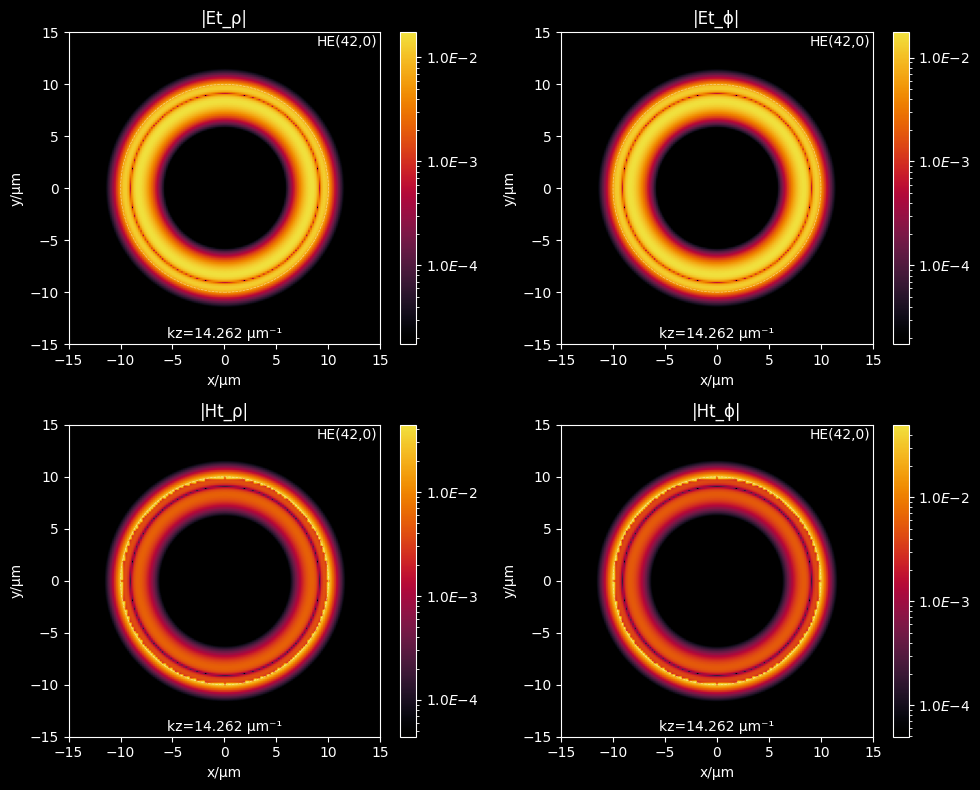

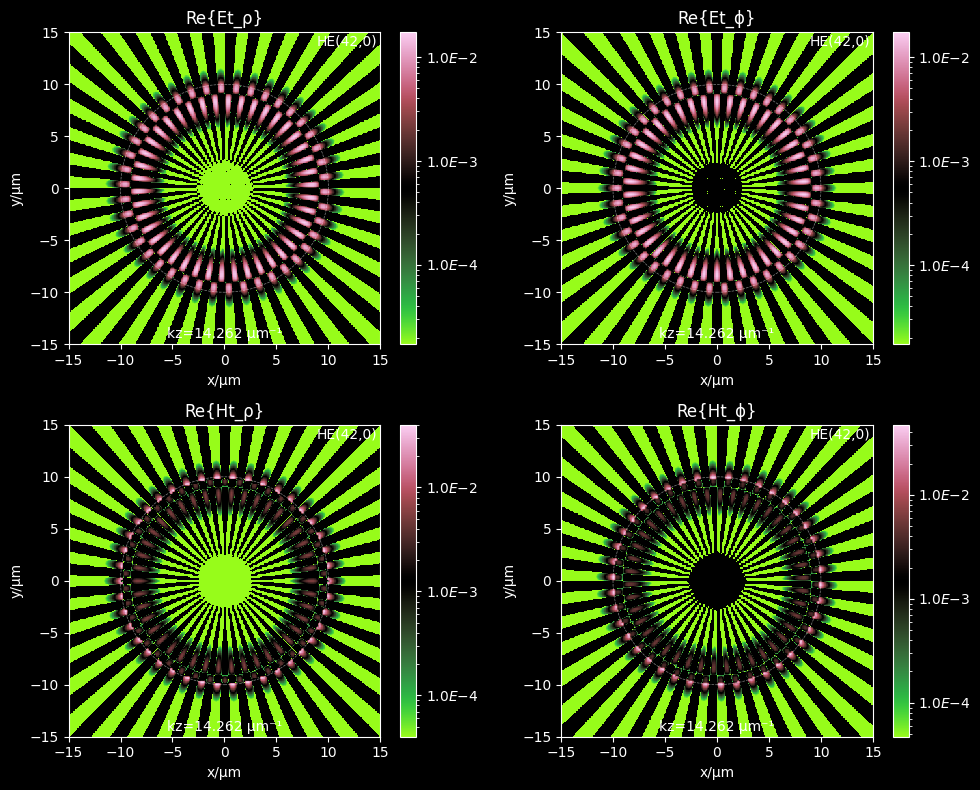

In [84]:
# Plotting a single mode
# In a panel of four figures:
# plot the magnitudes of the cylindrical components of the E
# and same for the H field.
# In another panel of four figures:
# plot the real and imaginary parts of the cylindrical components of E and H.

def fmt(x, pos):
    if x == 0:
        return '0'
    a, b = '{:.1e}'.format(x).split('e')
    b = int(b)
    return r'${} E{{{}}}$'.format(a, b)

plt.style.use('dark_background')
component_index = {"Et_ρ":(0,0), "Et_ϕ":(0,1), "Ht_ρ":(1,0), "Ht_ϕ":(1,1)}
index = -10
extent  = [-b,b,-b,b]
for fun_picker in [np.abs, np.real]:
    fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
    if fun_picker in [np.real, np.imag]:
        cmap = cm.watermelon
        if fun_picker == np.real:
            title_format = 'Re{%s}'
        else:
            title_format = 'Im{%s}'
    else:
        cmap = cm.ember
        title_format = '|%s|'
    for component, ci in component_index.items():
        field   = fiber_sol['eigenbasis'][index, ci[0], ci[1], :, :]
        field   = fun_picker(field)
        if np.max(field) == 0 and fun_picker != np.abs:
            if fun_picker == np.real:
                fun_picker = np.imag
                title_format = 'Im{%s}'
            else:
                fun_picker = np.real
                title_format = 'Re{%s}'
            field   = eigenbasis[index, ci[0], ci[1], :, :]
            field   = fun_picker(field)
        axis = axes[ci[0], ci[1]]
        if fun_picker in [np.real, np.imag]:
            themax = np.max(field)
            vmax = themax
            vmin = -themax
        else:
            vmax = np.max(field)
            vmin = 0
        iplot = axis.imshow(field, 
                # vmin=vmin,
                # vmax=vmax,
                norm=LogNorm(vmin=vmax*1e-3, vmax=vmax),
                extent=extent,
                cmap=cmap)
        axis.set_xlabel('x/µm')
        axis.set_ylabel('y/µm')
        axis.set_title(title_format % component)
        axis.text(0.99, 0.99, annotations[index][0], color='w', transform=axis.transAxes, horizontalalignment='right', verticalalignment='top')
        axis.text(0.5, 0.01, annotations[index][1], color='w', transform=axis.transAxes, horizontalalignment='center', verticalalignment='bottom')
        circle = Circle((0,0), a, linestyle='--', edgecolor='white', facecolor='none', alpha=0.5, linewidth=0.5)
        axis.add_patch(circle)
        divider = make_axes_locatable(axis)
        cax = divider.append_axes("right", size="5%", pad=0.2)
        plt.colorbar(iplot, cax=cax, format=ticker.FuncFormatter(fmt))
    plt.tight_layout()
    plt.show()

  0%|          | 0/736 [00:00<?, ?it/s]

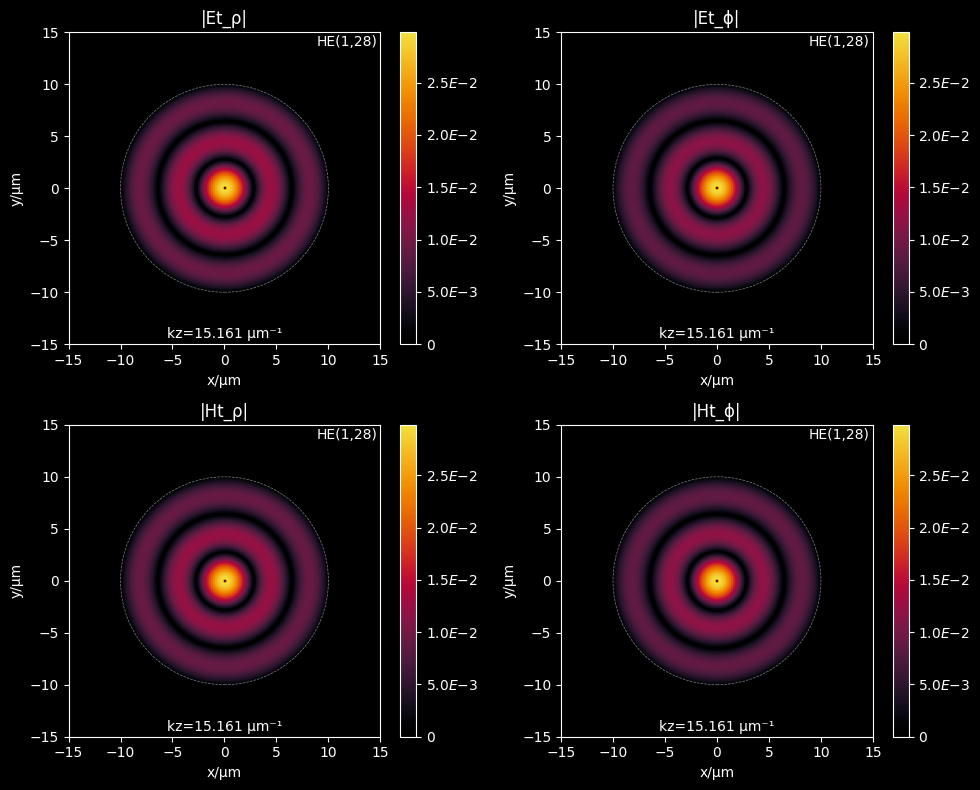

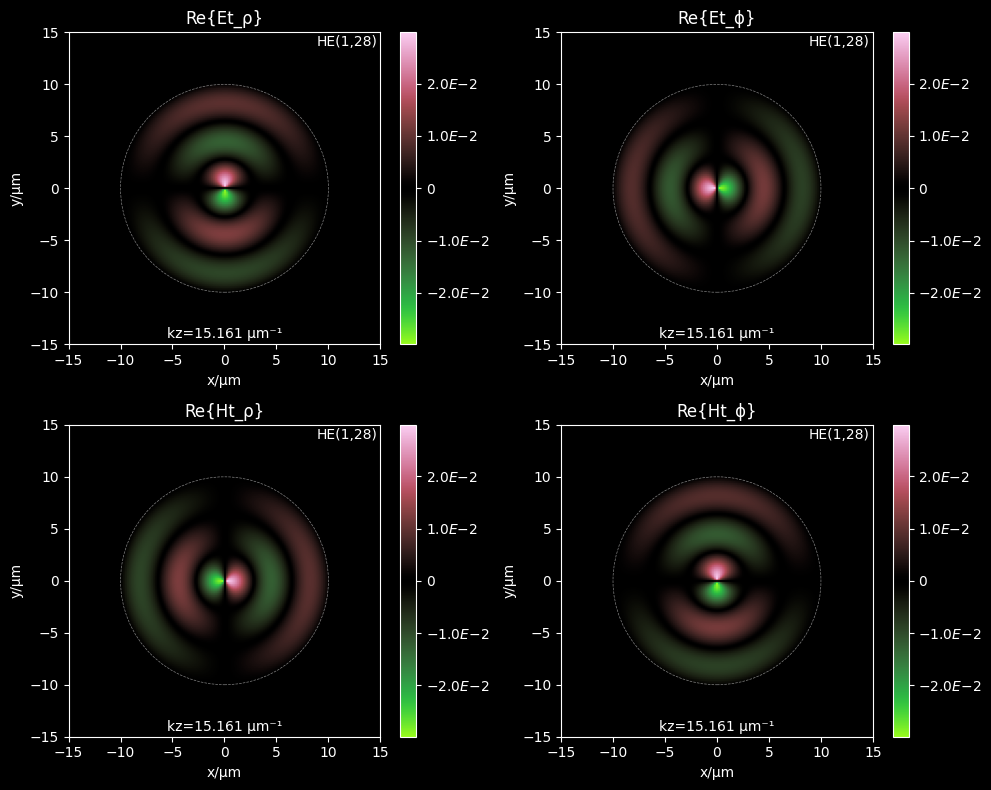

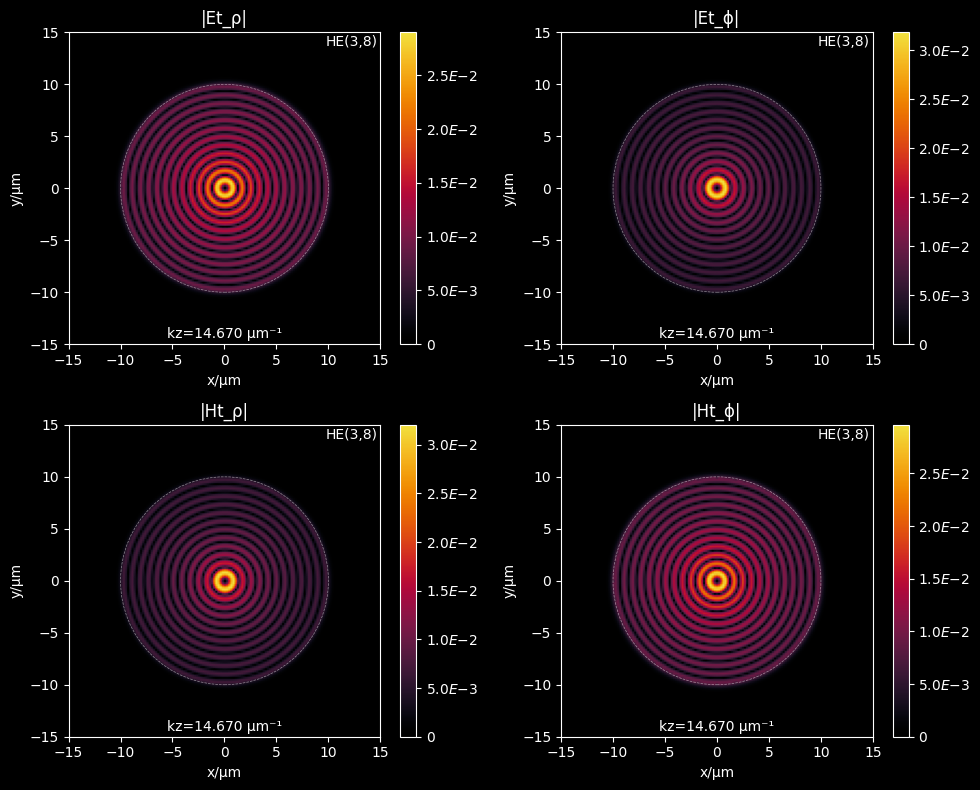

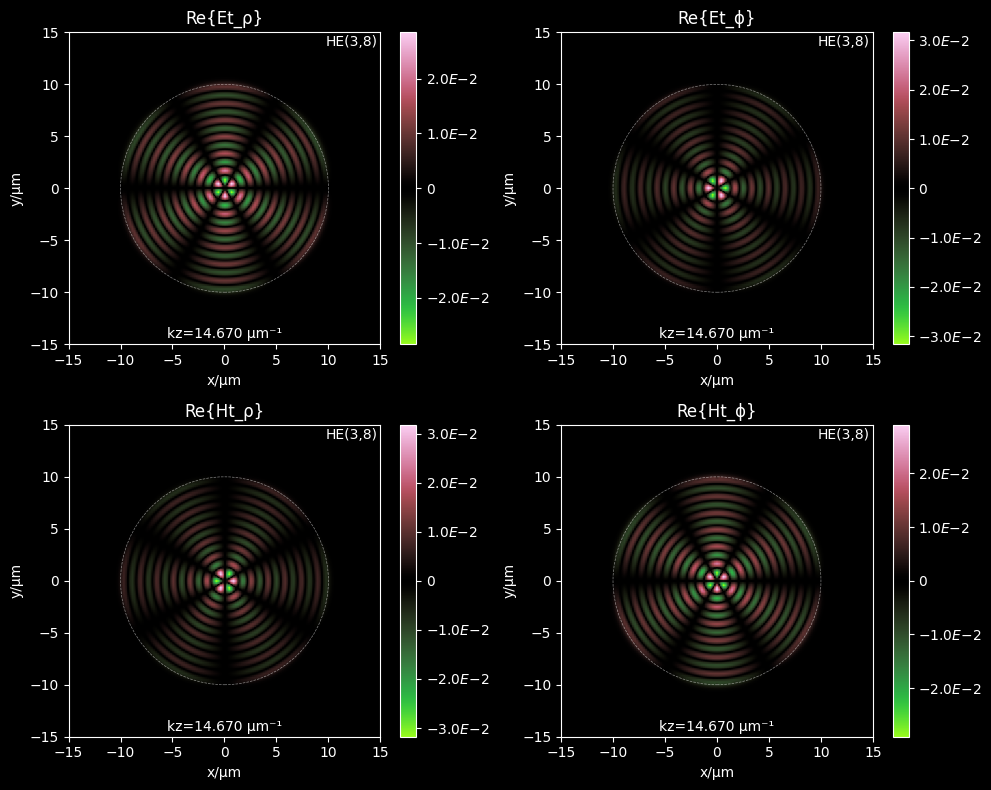

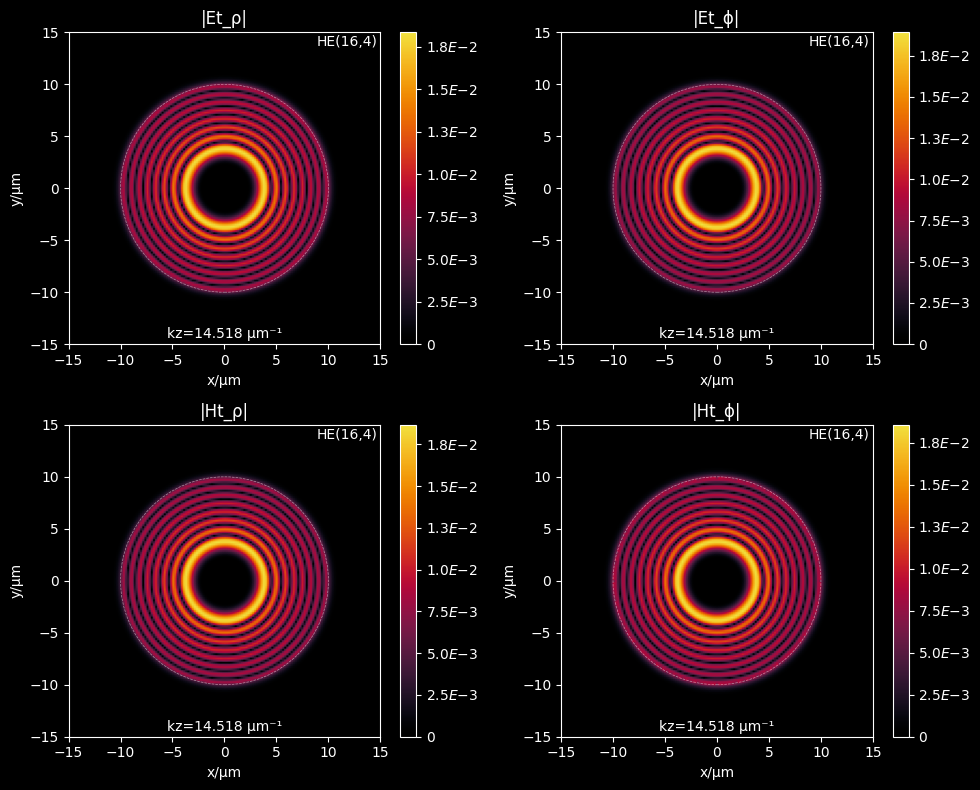

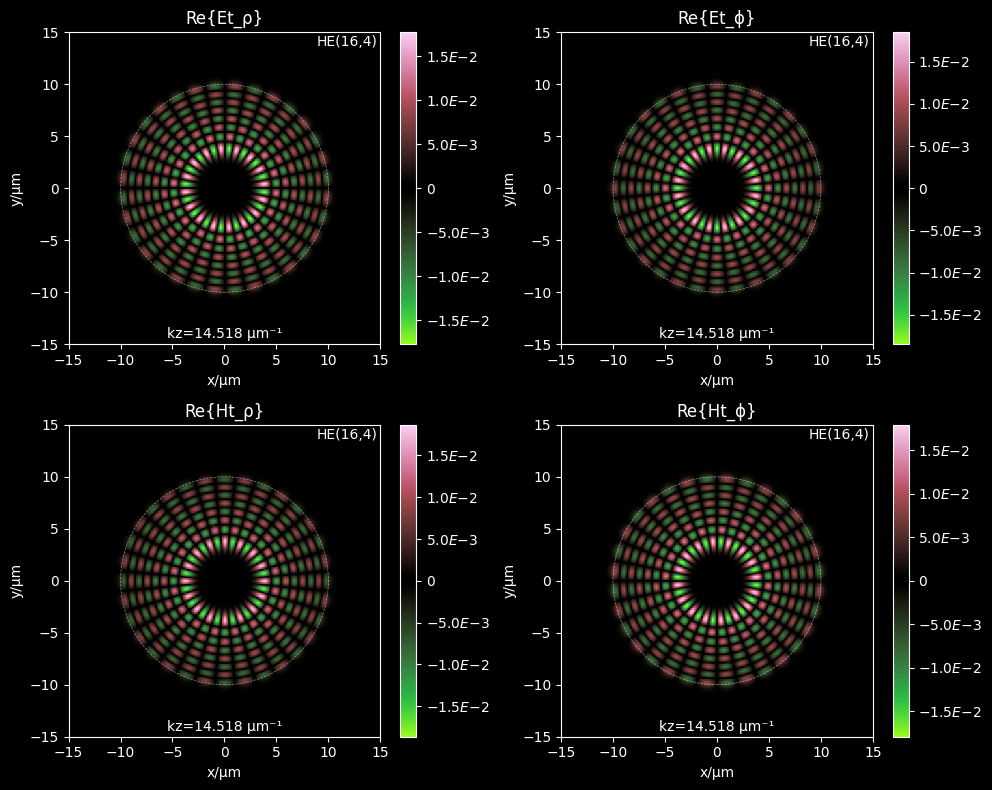

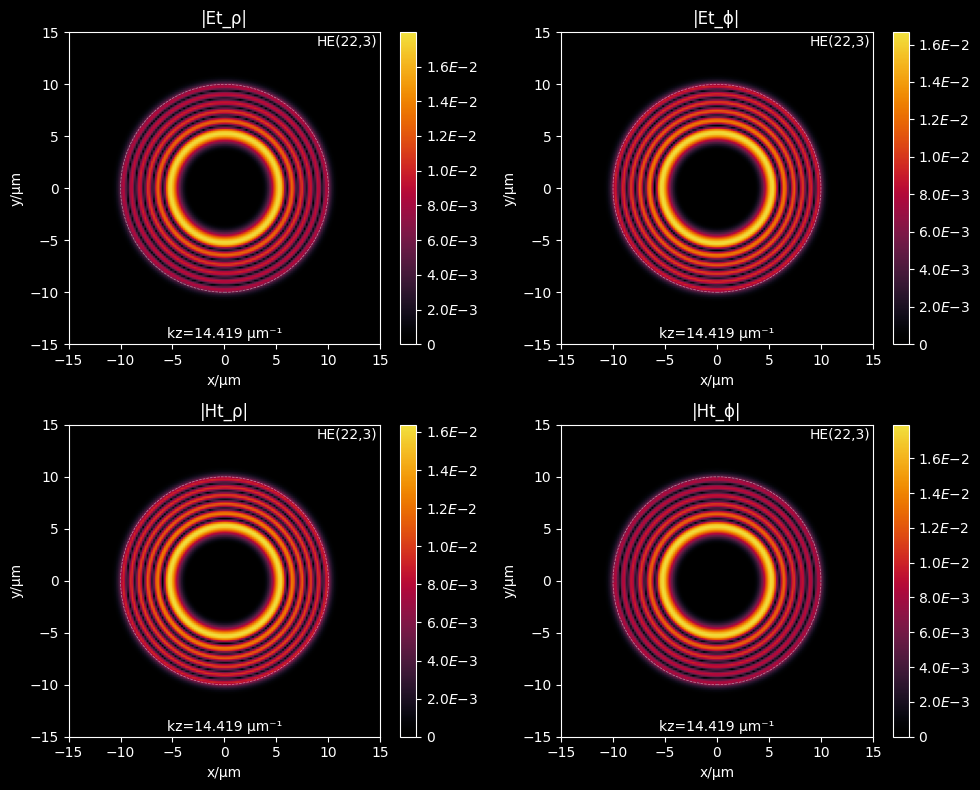

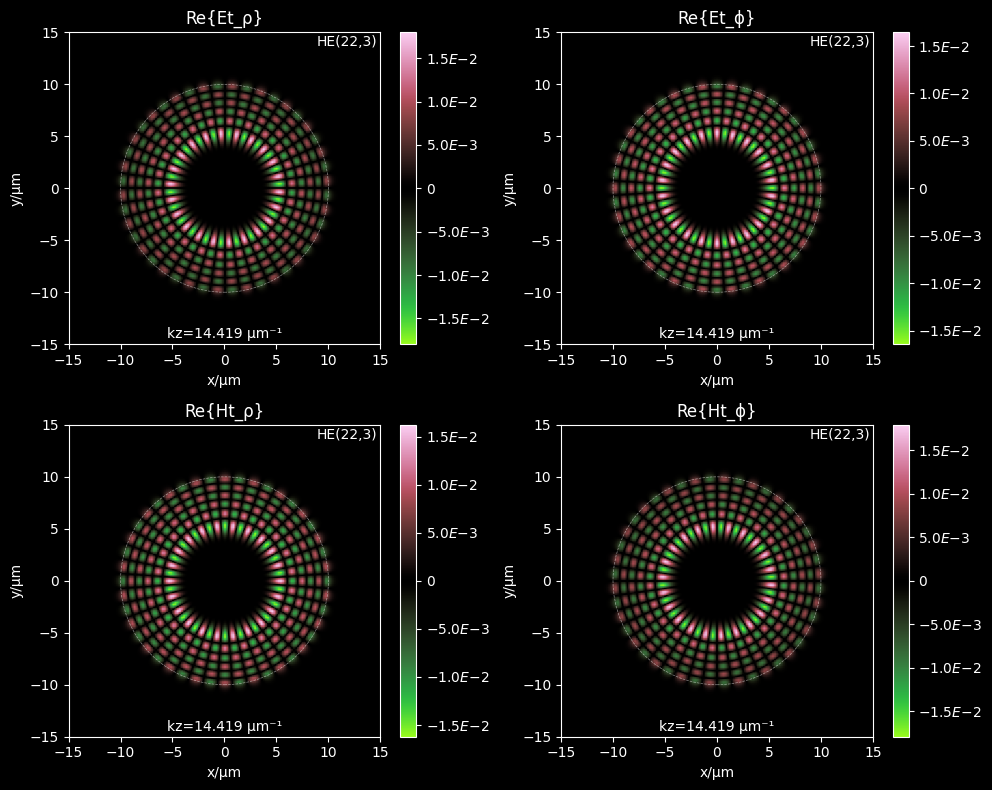

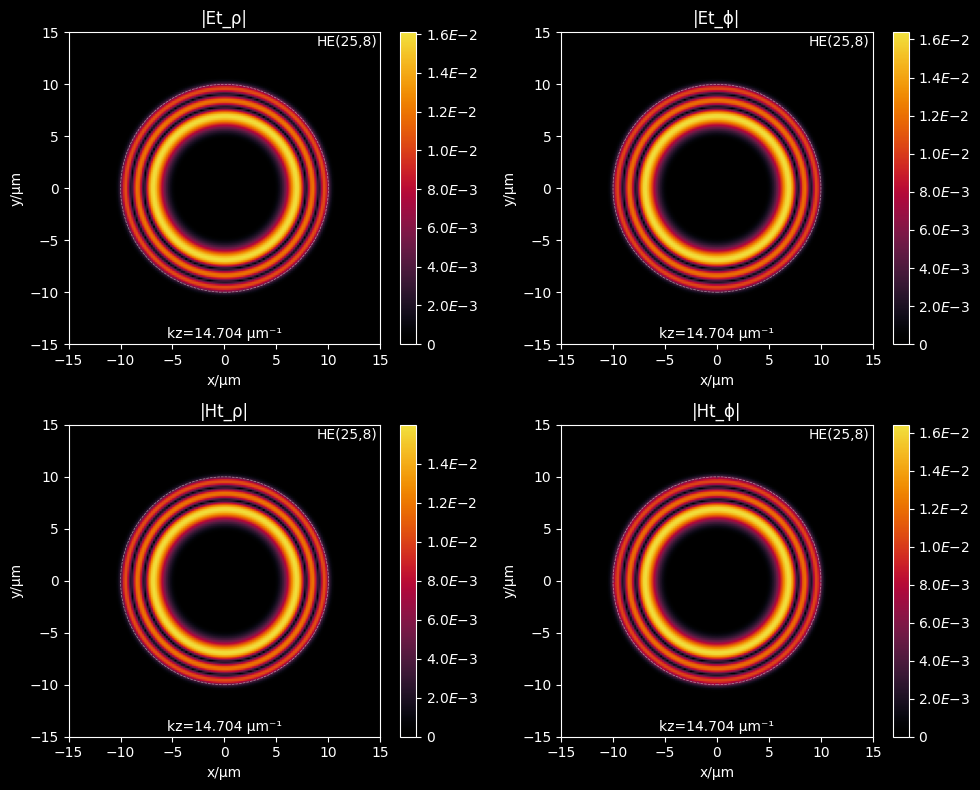

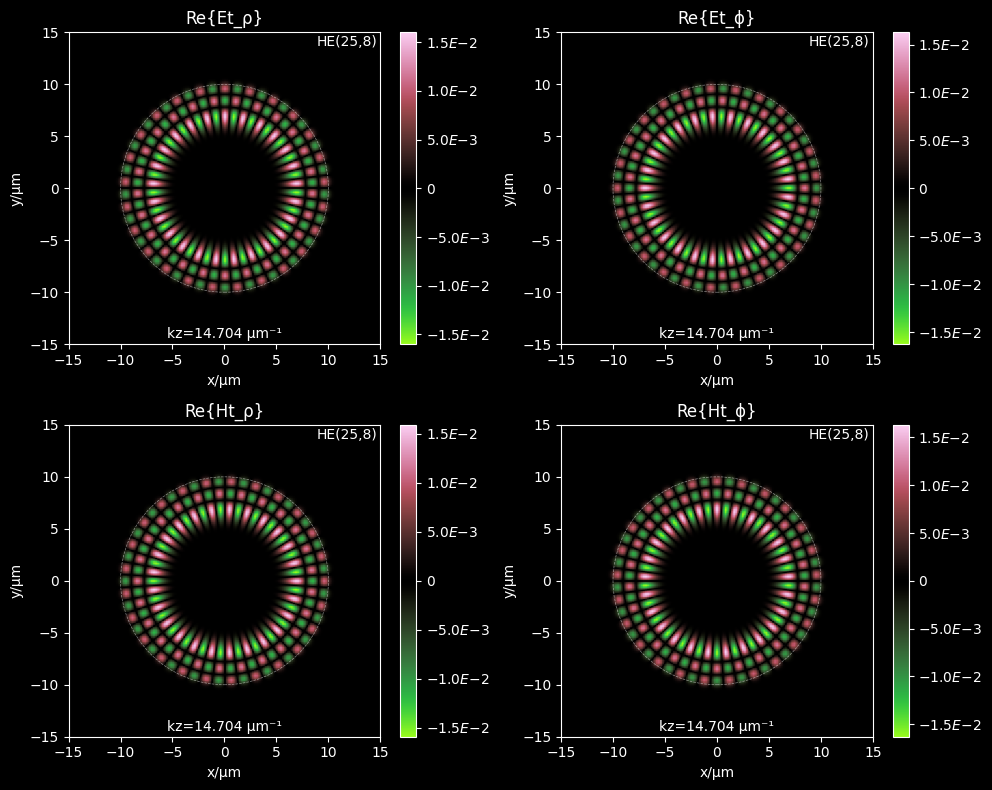

In [85]:
# same a above but
# plot for at most 10 randomly picked modes
save_em = False
totalModes = fiber_sol['totalModes']
eigenbasis = fiber_sol['eigenbasis']
plt.style.use('dark_background')
component_index = {"Et_ρ":(0,0), "Et_ϕ":(0,1), "Ht_ρ":(1,0), "Ht_ϕ":(1,1)}
extent  = [-b,b,-b,b]
imout = 10
counter = 0
for index in tqdm(range(totalModes)):
    if np.random.random() < imout/totalModes:
        counter += 1
    else:
        continue
    if counter >= imout:
        break
    for fun_picker in [np.abs, np.real]:
        fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10,8))
        if fun_picker in [np.real, np.imag]:
            cmap = cm.watermelon
            if fun_picker == np.real:
                title_format = 'Re{%s}'
            else:
                title_format = 'Im{%s}'
        else:
            cmap = cm.ember
            title_format = '|%s|'
        for component, ci in component_index.items():
            field   = eigenbasis[index, ci[0], ci[1], :, :]
            field   = fun_picker(field)
            if np.max(field) == 0 and fun_picker != np.abs:
                if fun_picker == np.real:
                    fun_picker = np.imag
                    title_format = 'Im{%s}'
                else:
                    fun_picker = np.real
                    title_format = 'Re{%s}'
                field   = fiber_sol['eigenbasis'][index, ci[0], ci[1], :, :]
                field   = fun_picker(field)
            axis = axes[ci[0], ci[1]]
            if fun_picker in [np.real, np.imag]:
                themax = np.max(field)
                vmax = themax
                vmin = -themax
            else:
                vmax = np.max(field)
                vmin = 0
            iplot = axis.imshow(field, 
                    vmin=vmin,
                    vmax=vmax,
                    extent=extent,
                    cmap=cmap)
            axis.set_xlabel('x/µm')
            axis.set_ylabel('y/µm')
            axis.set_title(title_format % component)
            axis.text(0.99, 0.99, annotations[index][0], color='w', transform=axis.transAxes, horizontalalignment='right', verticalalignment='top')
            axis.text(0.5, 0.01, annotations[index][1], color='w', transform=axis.transAxes, horizontalalignment='center', verticalalignment='bottom')
            circle = Circle((0,0), a, linestyle='--', edgecolor='white', facecolor='none', alpha=0.5, linewidth=0.5)
            axis.add_patch(circle)
            divider = make_axes_locatable(axis)
            cax = divider.append_axes("right", size="5%", pad=0.2)
            plt.colorbar(iplot, cax=cax, format=ticker.FuncFormatter(fmt))
        plt.tight_layout()
        if fun_picker in [np.real, np.imag]:
            fname = './FG050LGA/reim/mode-%d.png' % index
        else:
            fname = './FG050LGA/abs/mode-%d.png' % index
        if save_em:
            plt.savefig(fname)
        else:
            plt.show()
        plt.close()
